# Homework 4 – Decision Tree

**Course:** AI 240 Machine Learning  
**Instructor:** Dr. Uma Gajendragadkar  
**Name:** Kidus Assefa  
**Date:** 11/22   
**Partner:** Selamawit Gebnanaw

**Step 1: Data Exploration** - examines the dataset’s structure, key features, and target distribution

**Step 2: Data Preprocessing** - clean the dataset by handling missing values and preparing features for modeling

**Step 3: Modeling (Artificial Neural Network)** - simple feed-forward neural network is trained for binary classification

**Step 4: Evaluation** - measure the model's performance using predictions and accuracy metrics


# Step 1: Data Exploration

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
print("Dataset Shape:", df.shape)

print("\nColumn Names:")
print(df.columns)

print("\nInfo Summary:\n")
df.info()

Dataset Shape: (7043, 21)

Column Names:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Info Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-

Summary Statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Churn value distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


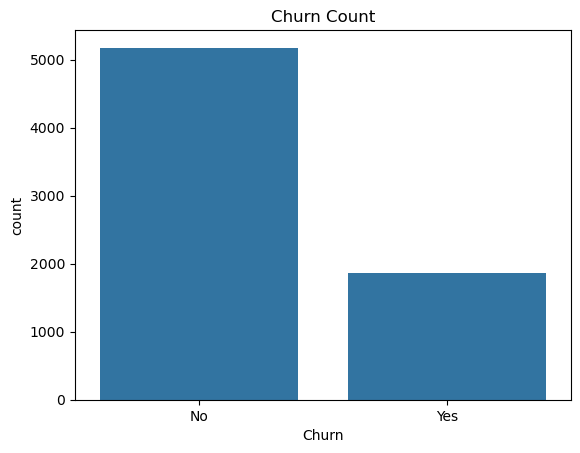

In [94]:
print("Summary Statistics:")
display(df.describe())

print("\nChurn value distribution:")
print(df["Churn"].value_counts())

sns.countplot(x="Churn", data=df)
plt.title("Churn Count")
plt.show()

# Step2: Data Preprocessing

In [95]:
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [96]:
print("Shape before cleaning:", df.shape)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()
print("Shape after cleaning:", df.shape)

Shape before cleaning: (7043, 21)
Shape after cleaning: (7032, 21)


In [97]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Churn"] = encoder.fit_transform(df["Churn"])

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = encoder.fit_transform(df[col])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [98]:
from sklearn.model_selection import train_test_split

y = df["Churn"]
x = df.drop(["Churn"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((5625, 20), (1407, 20))

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step3: Modeling

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary

C:\Users\Kidus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Model.summary of <Sequential name=sequential_6, built=True>>

In [101]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6447 - loss: 0.6203 - val_accuracy: 0.7520 - val_loss: 0.4927
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7647 - loss: 0.4725 - val_accuracy: 0.7911 - val_loss: 0.4366
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.7878 - loss: 0.4456 - val_accuracy: 0.7920 - val_loss: 0.4231
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7949 - loss: 0.4342 - val_accuracy: 0.7956 - val_loss: 0.4183
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.7949 - loss: 0.4282 - val_accuracy: 0.8009 - val_loss: 0.4160
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7978 - loss: 0.4232 - val_accuracy: 0.7991 - val_loss: 0.4119
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4196 - val_accuracy: 0.8027 - val_loss: 0.4109
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4170 - val_accuracy

# Step4: Evaluation

In [102]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.7790 - loss: 0.4531
Test Accuracy: 0.7789623141288757
Test Loss: 0.45306727290153503


In [103]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
[[905 128]
 [183 191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

